<a href="https://colab.research.google.com/github/heyanaleal/SeriesTemporais/blob/main/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Nova seção

In [ ]:
# Importando os dados
url = '/content/AirPassengers.csv'
data = pd.read_csv(url)
print(data.head(5))
data.size

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


288

# Nova seção

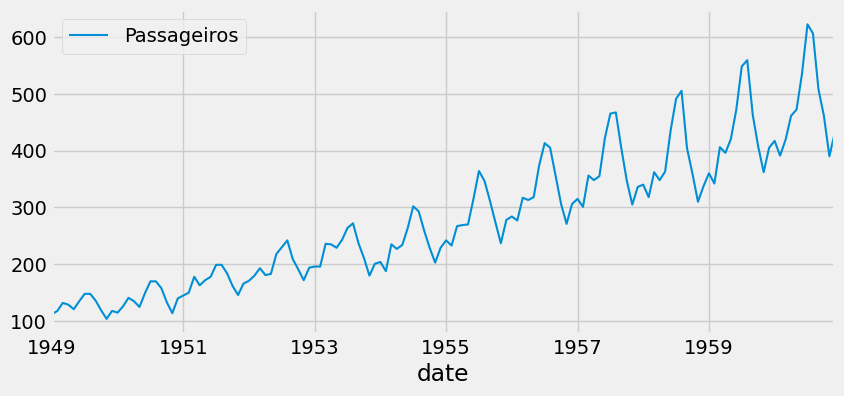

In [ ]:
# Renomeando as colunas do dataframe 'Month' para 'date' e '#Passengers' para 'passageiros'
data = data.rename(columns={'Month': 'date'})
data = data.rename(columns={'#Passengers': 'passageiros'})

# Converte a coluna 'date' para o formato de data ano-mês
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

 # Define a coluna 'date' como índice do dataframe
data = data.set_index('date')

# Define a frequência como mensal ('MS') e preenche os valores vazios com 0.0
data = data.asfreq('MS', fill_value=0.0)

# Ordena o dataframe pelos índices de data
data = data.sort_index()

# Plota os dados
# Cria uma figura com tamanho especificado
fig, ax = plt.subplots(figsize=(9, 4))

# Plota os dados de passageiros no eixo especificado
data['passageiros'].plot(ax=ax, label='Passageiros')
ax.legend()
plt.show()

In [ ]:
print(f'Número de linhas com valores ausentes: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [ ]:
# Código para verificar se não existem "buracos" nos dados
(data.index == pd.date_range(start=data.index.min(),
                             end=data.index.max(),
                             freq=data.index.freq)).all()

True

Train dates : 1949-01-01 00:00:00 --- 1957-12-01 00:00:00  (n=108)
Test dates  : 1958-01-01 00:00:00 --- 1960-12-01 00:00:00  (n=36)


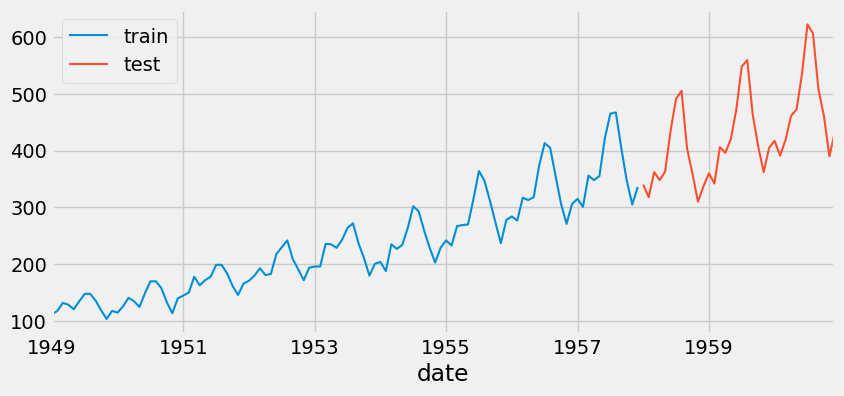

In [ ]:
# Divide dados em treinamento e teste
steps = 36
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4))
data_train['passageiros'].plot(ax=ax, label='train')
data_test['passageiros'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Configura e treina um RandomForestRegressor para série temporal
# Os parâmetros foram retirados do melhor modelo encontrado no material de origem
# Para conseguir os melhores parâmetros se faz necessário realizer hyperparameter tunning (verifique artigo original)
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=100, n_estimators=200, random_state=123),
                lags      = 12
             )

forecaster.fit(y=data_train['passageiros'])

In [ ]:
# Faz predição no conjunto de teste
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5)

1958-01-01    353.270
1958-02-01    350.495
1958-03-01    418.920
1958-04-01    429.085
1958-05-01    432.860
Freq: MS, Name: pred, dtype: float64

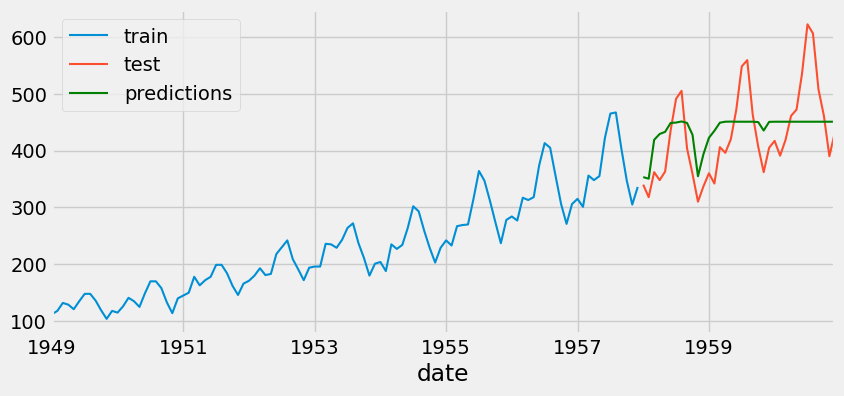

In [ ]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['passageiros'].plot(ax=ax, label='train')
data_test['passageiros'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions', color='green')
ax.legend();